In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

In [48]:
df=pd.read_csv('/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/merged_human_codon_occlusion_probs.csv')
print (df)

        transcript_id  synapse_probability  codon_synapse_probability  \
0     ENST00000000412             0.267578                   0.519531   
1     ENST00000002165             0.691406                   0.447266   
2     ENST00000002829             0.136719                   0.040283   
3     ENST00000003100             0.750000                   0.679688   
4     ENST00000005259             0.648438                   0.074707   
...               ...                  ...                        ...   
2848  ENST00000706733             0.527344                   0.185547   
2849  ENST00000706836             0.644531                   0.648438   
2850  ENST00000706904             0.117676                   0.142578   
2851  ENST00000706905             0.125977                   0.021118   
2852  ENST00000706915             0.453125                   0.157227   

      occlusion_synapse_probability  codon_mutation_effect  occlusion_effect  
0                          0.024292         

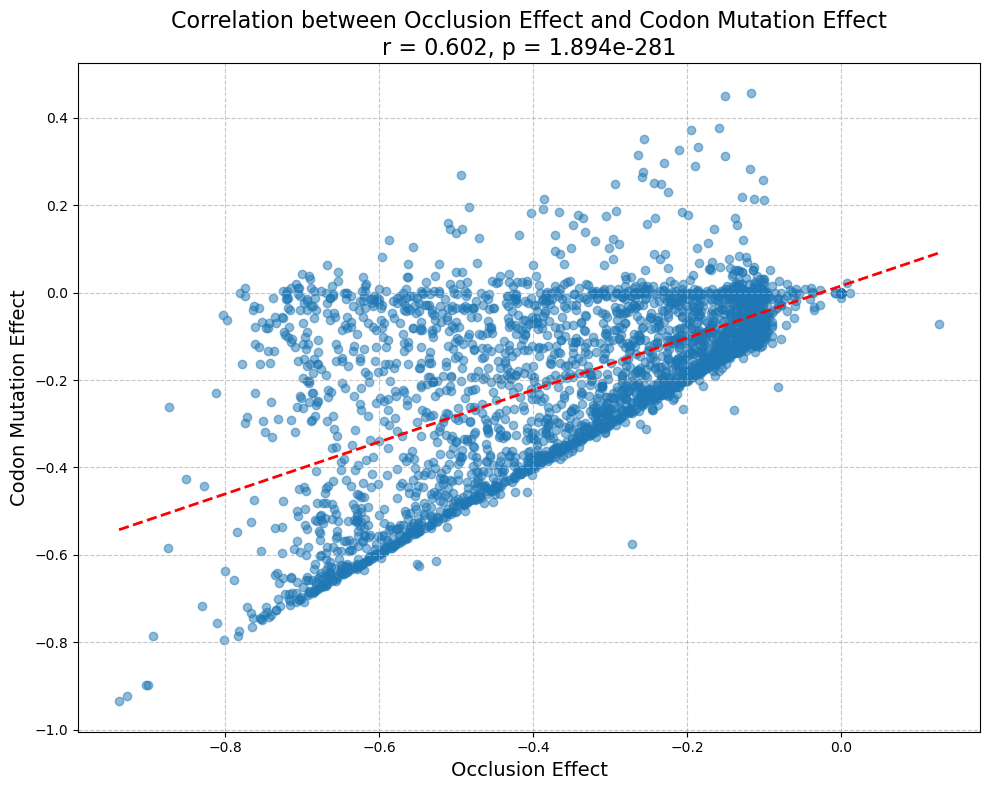

Pearson correlation coefficient: 0.602
P-value: 1.894e-281


In [49]:
# Calculate Pearson correlation coefficient
correlation, p_value = pearsonr(df['occlusion_effect'], df['codon_mutation_effect'])

# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(df['occlusion_effect'], df['codon_mutation_effect'], alpha=0.5)

# Add a trend line
z = np.polyfit(df['occlusion_effect'], df['codon_mutation_effect'], 1)
p = np.poly1d(z)
plt.plot(np.sort(df['occlusion_effect']), p(np.sort(df['occlusion_effect'])), 
         "r--", linewidth=2)

# Add labels and title
plt.xlabel('Occlusion Effect', fontsize=14)
plt.ylabel('Codon Mutation Effect', fontsize=14)
plt.title(f'Correlation between Occlusion Effect and Codon Mutation Effect\nr = {correlation:.3f}, p = {p_value:.3e}', 
          fontsize=16)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()

# To save the plot
# plt.savefig('occlusion_vs_codon_mutation.png', dpi=300, bbox_inches='tight')

plt.show()

# Print correlation statistics
print(f"Pearson correlation coefficient: {correlation:.3f}")
print(f"P-value: {p_value:.3e}")

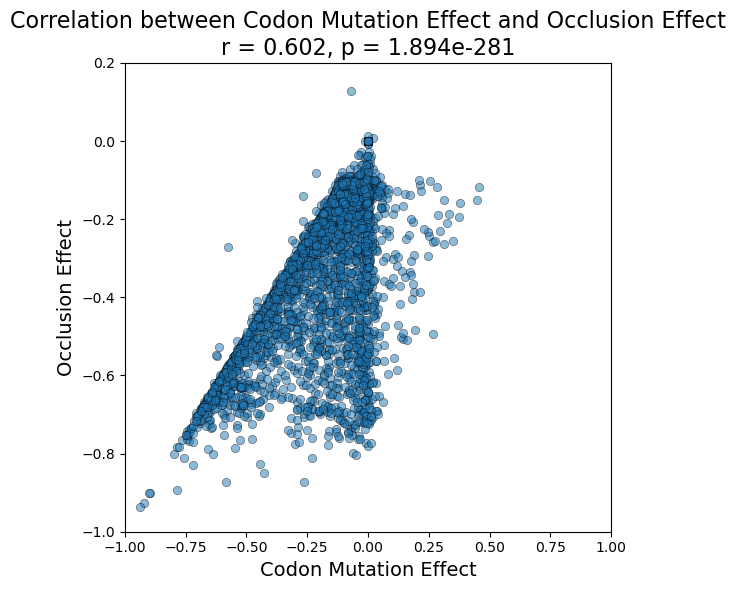

Pearson correlation coefficient: 0.602
P-value: 1.894e-281


In [50]:
# Calculate Pearson correlation coefficient
correlation, p_value = pearsonr(df['occlusion_effect'], df['codon_mutation_effect'])

# Create the scatter plot
plt.figure(figsize=(6, 6))
#plt.scatter(df['codon_mutation_effect'], df['occlusion_effect'], alpha=0.5)
plt.scatter(df['codon_mutation_effect'], df['occlusion_effect'], 
           alpha=0.5,
           edgecolor='black',  # Add black border to each point
           linewidth=0.5)      # Control the thickness of the border

# Add a trend line
z = np.polyfit(df['codon_mutation_effect'], df['occlusion_effect'], 1)
p = np.poly1d(z)
#plt.plot(np.sort(df['codon_mutation_effect']), p(np.sort(df['codon_mutation_effect'])), 
 #        "r--", linewidth=2)

# Set the axis limits specifically
plt.xlim(-1, 1)  # Codon mutation effect from -1 to 1
plt.ylim(-1, 0.2)  # Occlusion effect from -1 to 0

# Add labels and title
plt.xlabel('Codon Mutation Effect', fontsize=14)
plt.ylabel('Occlusion Effect', fontsize=14)
plt.title(f'Correlation between Codon Mutation Effect and Occlusion Effect\nr = {correlation:.3f}, p = {p_value:.3e}', 
          fontsize=16)

# Add grid
plt.grid(False)

# Improve layout
plt.tight_layout()

# To save the plot
# plt.savefig('codon_mutation_vs_occlusion.png', dpi=300, bbox_inches='tight')

plt.show()

# Print correlation statistics
print(f"Pearson correlation coefficient: {correlation:.3f}")
print(f"P-value: {p_value:.3e}")

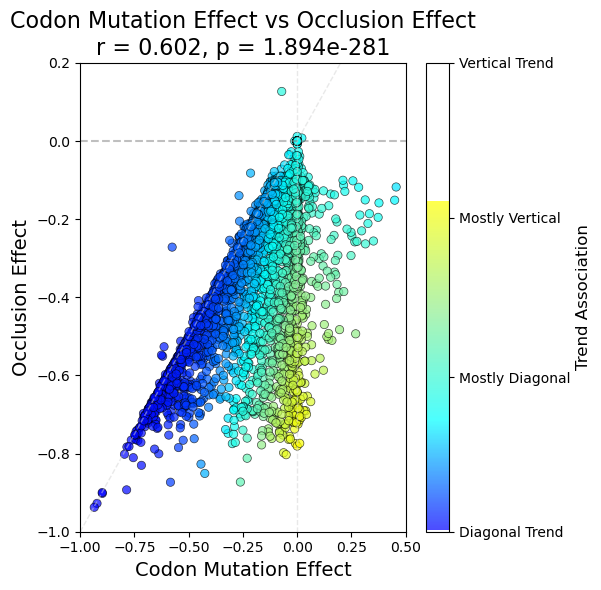

Pearson correlation coefficient: 0.602
P-value: 1.894e-281


In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient
correlation, p_value = pearsonr(df['occlusion_effect'], df['codon_mutation_effect'])

# Create a figure
plt.figure(figsize=(6, 6))

# Create a custom colormap with more intermediate colors for smoother transition
cmap = LinearSegmentedColormap.from_list('blue_to_yellow', 
                                        ['blue', 'cyan', 'lightgreen', 'yellow'], 
                                        N=256)

# Calculate color values based on proximity with more gradual transition
colors = []
for x, y in zip(df['codon_mutation_effect'], df['occlusion_effect']):
    # Distance to diagonal (y = x)
    diag_distance = abs(y - x) / np.sqrt(2)
    # Distance to vertical (x = 0)
    vert_distance = abs(x)
    
    # Calculate weights using less steep falloff for more gradual transition
    diag_weight = np.exp(-3 * diag_distance)  # Reduced from -10 to -3
    vert_weight = np.exp(-3 * vert_distance)  # Reduced from -10 to -3
    
    # Create a blended color value
    blend_factor = 2.0  # Adjust between 0.5 (more blending) and 2.0 (more separation)
    
    # Calculate normalized color value
    if diag_weight + vert_weight > 0:
        # Base color value
        color_value = vert_weight / (diag_weight + vert_weight)
        
        # Apply power function to make transition more gradual
        color_value = pow(color_value, blend_factor)
    else:
        color_value = 0.5  # Default if both weights are zero
        
    colors.append(color_value)

# Create the scatter plot with the smooth gradient colors
plt.scatter(df['codon_mutation_effect'], df['occlusion_effect'], 
           c=colors,
           cmap=cmap,
           alpha=0.7,
           edgecolor='black',
           linewidth=0.5)

# Add a trend line
z = np.polyfit(df['codon_mutation_effect'], df['occlusion_effect'], 1)
p = np.poly1d(z)
#plt.plot(np.sort(df['codon_mutation_effect']), p(np.sort(df['codon_mutation_effect'])), 
 #        "r--", linewidth=1.5, alpha=0.7)

# Add diagonal reference line (y = x) - shown in very light gray
x_vals = np.linspace(-1, 0.5, 100)
plt.plot(x_vals, x_vals, 'lightgray', linestyle='--', linewidth=1, alpha=0.5)

# Add vertical reference line (x = 0) - shown in very light gray
plt.axvline(x=0, color='lightgray', linestyle='--', linewidth=1, alpha=0.5)

# Set the axis limits
plt.xlim(-1, 0.5)
plt.ylim(-1, 0.2)

# Add labels and title
plt.xlabel('Codon Mutation Effect', fontsize=14)
plt.ylabel('Occlusion Effect', fontsize=14)
plt.title(f'Codon Mutation Effect vs Occlusion Effect\nr = {correlation:.3f}, p = {p_value:.3e}', 
          fontsize=16)

# Add a colorbar with gradient explanation
cbar = plt.colorbar()
cbar.set_label('Trend Association', fontsize=12)
cbar.set_ticks([0, 0.33, 0.67, 1])
cbar.set_ticklabels(['Diagonal Trend', 'Mostly Diagonal', 'Mostly Vertical', 'Vertical Trend'])

# Draw horizontal line at 0
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)

# Improve layout
plt.tight_layout()
plt.grid(False)
plt.show()

# Print correlation statistics
print(f"Pearson correlation coefficient: {correlation:.3f}")
print(f"P-value: {p_value:.3e}")




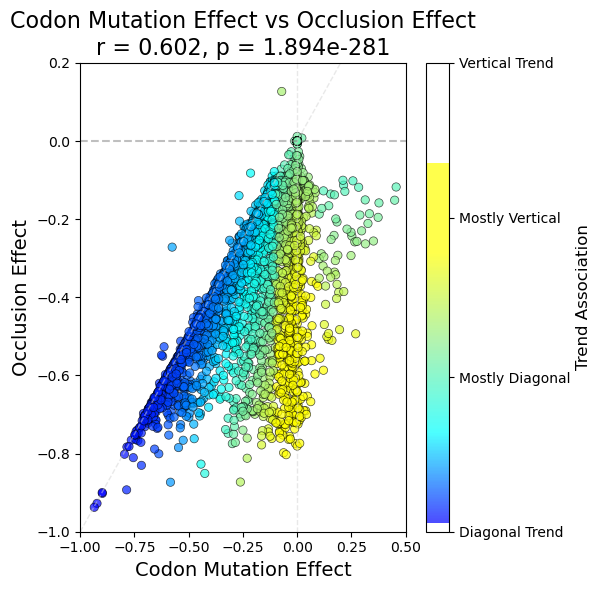

Pearson correlation coefficient: 0.602
P-value: 1.894e-281


In [61]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient
correlation, p_value = pearsonr(df['occlusion_effect'], df['codon_mutation_effect'])

# Create a figure
plt.figure(figsize=(6, 6))

# Create a custom colormap with more emphasis on yellow
cmap = LinearSegmentedColormap.from_list('blue_to_yellow', 
                                        ['blue', 'cyan', 'lightgreen', 'yellow', 'yellow'], 
                                        N=256)

# Calculate color values based on proximity with more gradual transition
colors = []
for x, y in zip(df['codon_mutation_effect'], df['occlusion_effect']):
    # Distance to diagonal (y = x)
    diag_distance = abs(y - x) / np.sqrt(2)
    # Distance to vertical (x = 0)
    vert_distance = abs(x)
    
    # Calculate weights with stronger vertical influence
    diag_weight = np.exp(-3 * diag_distance)  # Keep as is
    vert_weight = np.exp(-2 * vert_distance)  # Use -2 instead of -3 to strengthen vertical influence
    
    # Increase the weight for points very close to vertical
    if vert_distance < 0.1:  # If very close to vertical line
        vert_weight *= 1.5  # Boost vertical weight by 50%
    
    # Create a blended color value
    blend_factor = 2.0  # Adjust between 0.5 (more blending) and 2.0 (more separation)
    
    # Calculate normalized color value
    if diag_weight + vert_weight > 0:
        # Base color value
        color_value = vert_weight / (diag_weight + vert_weight)
        
        # Apply power function to make transition more gradual
        color_value = pow(color_value, blend_factor)
    else:
        color_value = 0.5  # Default if both weights are zero
        
    colors.append(color_value)

# Create the scatter plot with the smooth gradient colors
plt.scatter(df['codon_mutation_effect'], df['occlusion_effect'], 
           c=colors,
           cmap=cmap,
           alpha=0.7,
           edgecolor='black',
           linewidth=0.5)

# Add a trend line
z = np.polyfit(df['codon_mutation_effect'], df['occlusion_effect'], 1)
p = np.poly1d(z)
#plt.plot(np.sort(df['codon_mutation_effect']), p(np.sort(df['codon_mutation_effect'])), 
#         "r--", linewidth=1.5, alpha=0.7)

# Add diagonal reference line (y = x) - shown in very light gray
x_vals = np.linspace(-1, 0.5, 100)
plt.plot(x_vals, x_vals, 'lightgray', linestyle='--', linewidth=1, alpha=0.5)

# Add vertical reference line (x = 0) - shown in very light gray
plt.axvline(x=0, color='lightgray', linestyle='--', linewidth=1, alpha=0.5)

# Set the axis limits
plt.xlim(-1, 0.5)
plt.ylim(-1, 0.2)

# Add labels and title
plt.xlabel('Codon Mutation Effect', fontsize=14)
plt.ylabel('Occlusion Effect', fontsize=14)
plt.title(f'Codon Mutation Effect vs Occlusion Effect\nr = {correlation:.3f}, p = {p_value:.3e}', 
          fontsize=16)

# Add a colorbar with gradient explanation
cbar = plt.colorbar()
cbar.set_label('Trend Association', fontsize=12)
cbar.set_ticks([0, 0.33, 0.67, 1])
cbar.set_ticklabels(['Diagonal Trend', 'Mostly Diagonal', 'Mostly Vertical', 'Vertical Trend'])

# Draw horizontal line at 0
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)

# Improve layout
plt.tight_layout()
plt.grid(False)
plt.show()

# Print correlation statistics
print(f"Pearson correlation coefficient: {correlation:.3f}")
print(f"P-value: {p_value:.3e}")

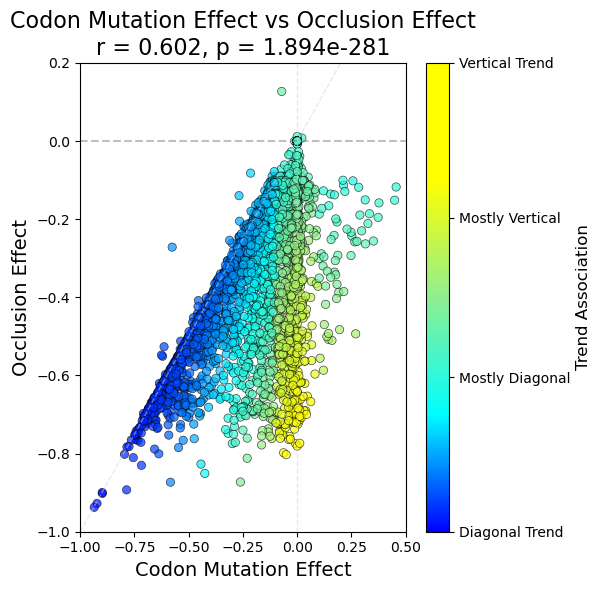

Pearson correlation coefficient: 0.602
P-value: 1.894e-281


In [64]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient
correlation, p_value = pearsonr(df['occlusion_effect'], df['codon_mutation_effect'])

# Create a figure
plt.figure(figsize=(6, 6))

# Create a custom colormap with more emphasis on yellow
cmap = LinearSegmentedColormap.from_list('blue_to_yellow', 
                                        ['blue', 'cyan', 'lightgreen', 'yellow', 'yellow'], 
                                        N=256)

# Calculate color values based on proximity with more gradual transition
colors = []
for x, y in zip(df['codon_mutation_effect'], df['occlusion_effect']):
    # Distance to diagonal (y = x)
    diag_distance = abs(y - x) / np.sqrt(2)
    # Distance to vertical (x = 0)
    vert_distance = abs(x)
    
    # Calculate weights with stronger vertical influence
    diag_weight = np.exp(-3 * diag_distance)  # Keep as is
    vert_weight = np.exp(-2 * vert_distance)  # Use -2 instead of -3 to strengthen vertical influence
    
    # Increase the weight for points very close to vertical
    if vert_distance < 0.1:  # If very close to vertical line
        vert_weight *= 1.5  # Boost vertical weight by 50%
    
    # Create a blended color value
    blend_factor = 2.0  # Adjust between 0.5 (more blending) and 2.0 (more separation)
    
    # Calculate normalized color value
    if diag_weight + vert_weight > 0:
        # Base color value
        color_value = vert_weight / (diag_weight + vert_weight)
        
        # Apply power function to make transition more gradual
        color_value = pow(color_value, blend_factor)
    else:
        color_value = 0.5  # Default if both weights are zero
        
    colors.append(color_value)

# Create a normalization that ensures the colors span the full range
norm = Normalize(vmin=0, vmax=1)

# Create the scatter plot with the smooth gradient colors and normalization
plt.scatter(df['codon_mutation_effect'], df['occlusion_effect'], 
           c=colors,
           cmap=cmap,
           norm=norm,
           alpha=0.7,
           edgecolor='black',
           linewidth=0.5)

# Add diagonal reference line (y = x) - shown in very light gray
x_vals = np.linspace(-1, 0.5, 100)
plt.plot(x_vals, x_vals, 'lightgray', linestyle='--', linewidth=1, alpha=0.5)

# Add vertical reference line (x = 0) - shown in very light gray
plt.axvline(x=0, color='lightgray', linestyle='--', linewidth=1, alpha=0.5)

# Set the axis limits
plt.xlim(-1, 0.5)
plt.ylim(-1, 0.2)

# Add labels and title
plt.xlabel('Codon Mutation Effect', fontsize=14)
plt.ylabel('Occlusion Effect', fontsize=14)
plt.title(f'Codon Mutation Effect vs Occlusion Effect\nr = {correlation:.3f}, p = {p_value:.3e}', 
          fontsize=16)

# Add a colorbar with rectangular shape (no extensions)
# Get the current axes to pass to colorbar
ax = plt.gca()

# Create the scalar mappable for the colorbar
norm = Normalize(vmin=0, vmax=1)  # Ensure normalization is applied to the colorbar as well
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # This is a required placeholder

# Create the colorbar with the current axes specified
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Trend Association', fontsize=12)
cbar.set_ticks([0, 0.33, 0.67, 1])
cbar.set_ticklabels(['Diagonal Trend', 'Mostly Diagonal', 'Mostly Vertical', 'Vertical Trend'])

# Draw horizontal line at 0
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)

# Improve layout
plt.tight_layout()
plt.grid(False)
plt.show()

# Print correlation statistics
print(f"Pearson correlation coefficient: {correlation:.3f}")
print(f"P-value: {p_value:.3e}")







Pearson correlation coefficient: 0.602
P-value: 1.894e-281


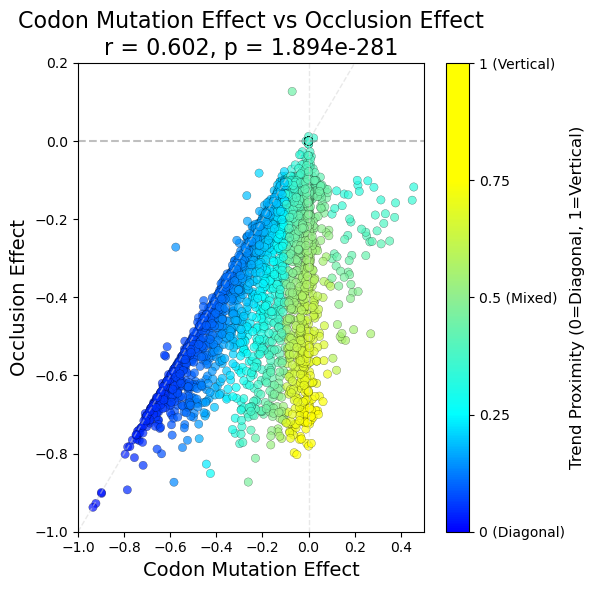

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient
correlation, p_value = pearsonr(df['occlusion_effect'], df['codon_mutation_effect'])

# Create a figure
plt.figure(figsize=(6, 6))

# Create a custom colormap with more emphasis on yellow
cmap = LinearSegmentedColormap.from_list('blue_to_yellow', 
                                        ['blue', 'cyan', 'lightgreen', 'yellow', 'yellow'], 
                                        N=256)

# Calculate color values based on proximity with more gradual transition
colors = []
for x, y in zip(df['codon_mutation_effect'], df['occlusion_effect']):
    # Distance to diagonal (y = x)
    diag_distance = abs(y - x) / np.sqrt(2)
    # Distance to vertical (x = 0)
    vert_distance = abs(x)
    
    # Calculate weights with stronger vertical influence
    diag_weight = np.exp(-3 * diag_distance)  # Keep as is
    vert_weight = np.exp(-2 * vert_distance)  # Use -2 instead of -3 to strengthen vertical influence
    
    # Increase the weight for points very close to vertical
    if vert_distance < 0.1:  # If very close to vertical line
        vert_weight *= 1.5  # Boost vertical weight by 50%
    
    # Create a blended color value
    blend_factor = 2.0  # Adjust between 0.5 (more blending) and 2.0 (more separation)
    
    # Calculate normalized color value - this will be between 0 and 1
    # 0 = fully diagonal pattern, 1 = fully vertical pattern
    if diag_weight + vert_weight > 0:
        # Base color value
        color_value = vert_weight / (diag_weight + vert_weight)
        
        # Apply power function to make transition more gradual
        color_value = pow(color_value, blend_factor)
    else:
        color_value = 0.5  # Default if both weights are zero
        
    colors.append(color_value)

# Create a normalization that ensures the colors span the full range
norm = Normalize(vmin=0, vmax=1)

# Create the scatter plot with the smooth gradient colors and normalization
plt.scatter(df['codon_mutation_effect'], df['occlusion_effect'], 
           c=colors,
           cmap=cmap,
           norm=norm,
           alpha=0.7,
           edgecolor='black',
           linewidth=0.2)



# Add diagonal reference line (y = x) - shown in very light gray
x_vals = np.linspace(-1, 0.5, 100)
plt.plot(x_vals, x_vals, 'lightgray', linestyle='--', linewidth=1, alpha=0.5)

# Add vertical reference line (x = 0) - shown in very light gray
plt.axvline(x=0, color='lightgray', linestyle='--', linewidth=1, alpha=0.5)

# Set the axis limits
plt.xlim(-1, 0.5)
plt.ylim(-1, 0.2)

# Add labels and title
plt.xlabel('Codon Mutation Effect', fontsize=14)
plt.ylabel('Occlusion Effect', fontsize=14)
plt.title(f'Codon Mutation Effect vs Occlusion Effect\nr = {correlation:.3f}, p = {p_value:.3e}', 
          fontsize=16)

# Add a colorbar with meaningful numerical values
# Get the current axes to pass to colorbar
ax = plt.gca()

# Create the scalar mappable for the colorbar
norm = Normalize(vmin=0, vmax=1)  # Ensure normalization is applied to the colorbar as well
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # This is a required placeholder

# Create the colorbar with the current axes specified
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Trend Proximity (0=Diagonal, 1=Vertical)', fontsize=12)

# Set tick positions and corresponding values
cbar.set_ticks([0, 0.25, 0.5, 0.75, 1])
cbar.set_ticklabels(['0 (Diagonal)', '0.25', '0.5 (Mixed)', '0.75', '1 (Vertical)'])



# Draw horizontal line at 0
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)

# Improve layout
plt.tight_layout()
plt.grid(False)


# Print correlation statistics
print(f"Pearson correlation coefficient: {correlation:.3f}")
print(f"P-value: {p_value:.3e}")

plt.savefig('/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/codon_mutation_occlusion_correlation_blue_yellow.svg')
plt.show()